<a href="https://colab.research.google.com/github/hakdj/teamproject2_final/blob/master/0923_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도구 모음

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 45.6 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import konlpy
from konlpy.tag import Okt
okt = Okt() # 형태소 추출
from konlpy.tag import Twitter # 한글 형태소 추출

from collections import Counter # count 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 파일 가져오기

In [5]:
df=pd.read_csv('./youtubecomment.csv',encoding='cp949')

In [6]:
df.isnull().sum()

title      0
video      0
comment    3
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9182 entries, 0 to 9181
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9182 non-null   object
 1   video    9182 non-null   object
 2   comment  9179 non-null   object
dtypes: object(3)
memory usage: 215.3+ KB


In [8]:
df

,title,video,comment
0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,콩,eu7HhcuRsL4,믹서기를 사야겄네..
3,콩,eu7HhcuRsL4,골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4,콩,eu7HhcuRsL4,나중에 해줘야디
...,...,...,...
9177,열무,8PEOg1YFqUU,꼭 해봐야겠네요 맛있게 잘 될것같아요
9178,열무,8PEOg1YFqUU,배즙 말고 다른 재료는 어떤게 있을까요? 배가 많이 비싸요
9179,열무,8PEOg1YFqUU,좋아요 꾹 입니다
9180,열무,8PEOg1YFqUU,"수박을 열무랑 함께하면 무슨 맛일까..? 궁금해서 저도 열무,얼갈이 사러 갑니다.ㅎ..."


In [9]:
df2=df.dropna(how='any')

In [10]:
df2=df2.reset_index()

In [ ]:
df2

### 원하는 농수산물 선택해서 list에 담기

In [136]:
lists=[]
ans=input()
for i in range(0,len(df2)):
  if df2['title'][i]==ans:
    lists.append(df2['comment'][i])
len(lists)


시금치


391

In [ ]:
# 담긴 내용 확인용
lists

### 이모티콘 제거
### 코멘트 df 생성 및 저장

In [14]:
import re

In [17]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

def apply_regular_expression(text):
    hans = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]') # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hans.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result


In [137]:
#코멘트 df생성 및 저장
comment_result = []
for i in range(0,len(lists)):
  tokens = re.sub(emoji_pattern,"", lists[i])
  tokens = re.sub(han,"",tokens)
  comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])
#comment_result
comment_result.to_csv(r"./"+f"{ans}.csv",index=False, encoding='CP949')
type(comment_result)

pandas.core.frame.DataFrame

# 분석

### 명사 전처리 및 빈도 출력

In [21]:
twitter = Twitter() 
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

In [ ]:
#확인용
morphs

In [23]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Alpha'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
        if tag in ['Noun'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
print(noun_adj_adv_list)

['영어', '자막', '부탁', '한국', '요리', '관심', '외국인', '한국', '최고', '요리사', '소개', '통역', '소개', '반응', '왜', '설명', '해먹', '첨부', '터', '소금', '반', '액젓', '반', '해도', '용', '항상', '레시피', '식초', '고깃집', '무쌈', '맛', '식초', '백종원', '여름', '거', '고추장', '전', '액젓', '버전', '여름', '무', '백종원', '만능', '볶음', '고추장', '비비', '디저트', '고추장', '저', '식초', '별로', '식초', '덜', '쌤', '감솨', '목', '장갑', '스텝', '머리', '쏙쏙', '어쩜', '먹는모습', '복', '맛', '백종원', '마자', '거', '스트리트', '푸드', '지금', '왜', '맛', '밀폐', '토옹', '전문가', '스멜', '연기', '잼', '제', '바로', '채칼', '트라우마', '기억', '오오오', '집', '절대', '욤', '꽃', '소금', '소금', '마자', '트라우마', '인', '요리', '웃음', '깨알', '혹시', '무', '순서', '기억', '유', '암', '상관', '백종원', '매력', '쩜', '애인', '거', '소금', '김치', '젤', '백종원', '최고', '니', '글씨', '글씨', '마구', '훼방', '혹시', '대해', '신분', 'lt', 'lt', '미스터리', 'gt', 'gt', 'b', '미스터리', 'b', '책', '궁금증', '싹', '달걀', '개', '김', '장', '어제', '찌', '끗', '볼때', '여사', '왜', '채칼', '손', '살점', '뒤', '채칼', '감자', '칼', '때', '버벅거림', '무', '뭘', '고민', '영상', '볶음밥', '맛', '주부', '영상', '보고', '처음', '설명', '만능', '액젓', '각', '조만간', '처음', '액젓', '멸치액젓', 

In [24]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
print(words)

{'백종원': 69, '요리': 61, '맛': 60, '진짜': 56, '거': 45, '무': 45, '저': 42, '치킨': 42, '간장': 38, '레시피': 36, '때': 34, '음식': 33, 'b': 31, '국': 28, '집': 27, '장아찌': 25, '보고': 24, '요': 24, '해': 24, '라면': 24, '최고': 23, '왜': 22, '오늘': 22, '양파': 22, '시금치': 22, '쌤': 21, '영상': 21, '물': 21, '해먹': 20, '사람': 19, '항상': 18, '재료': 18, '소스': 18, '액젓': 16, '식초': 16, '대표': 15, '감사': 15, '안': 15, '설명': 14, '만능': 14, '좀': 14, 'quot': 14, '개': 13, '참기름': 13, '대신': 13, '소고기': 13, '전': 12, '혹시': 12, '설탕': 12, '덕분': 12, '무가': 12, '계란': 12, '정도': 12, '꼭': 12, '국물': 12, '소금': 11, '제': 11, '김치': 10, '역시': 10, '분': 10, '가지': 10, '엄마': 10, '방송': 10, '해도': 9, '볶음': 9, '사용': 9, '우리': 9, '방금': 9, '아저씨': 9, '술': 9, '방법': 9, '태국': 9, '부탁': 8, '지금': 8, '처음': 8, '무우': 8, '애': 8, '듯': 8, '한번': 8, '고추': 8, '무국': 8, '대박': 8, '뭐': 8, '야채': 8, '한국': 7, '머리': 7, '유': 7, '니': 7, '냄새': 7, '난': 7, '통': 7, '봉지': 7, '진라면': 7, '기름': 7, '밥': 7, '법': 7, 'a': 7, '사랑': 7, '고기': 7, '조금': 7, '활용': 7, '짱아찌': 7, '인분': 7, '소개': 6, '용': 6, '바로': 6, '주부

### 시각화

In [25]:
from wordcloud import WordCloud # 텍스트 시각화
import matplotlib.pyplot as plt # 시각화 패키지
import matplotlib 
from IPython.display import set_matplotlib_formats

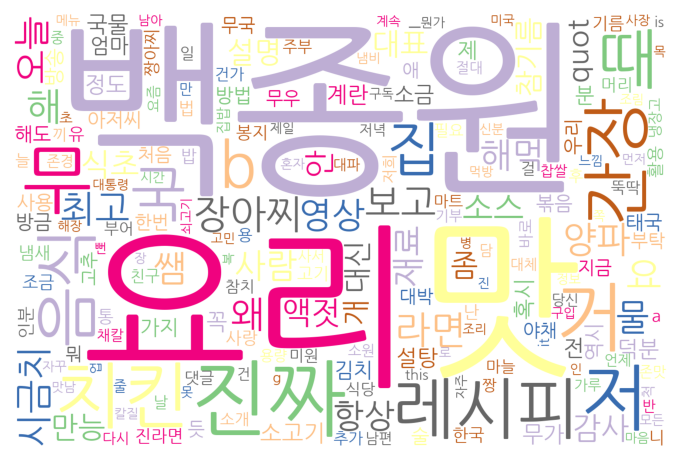

In [26]:
#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/Nanum.TTF', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### 그래프

In [27]:
import matplotlib.pylab as plt2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = "/content/NanumSquareL.ttf"
fontprop = fm.FontProperties(fname=path, size=20) # 글자 크기 조정

In [28]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
type(comment_result)



pandas.core.frame.DataFrame

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


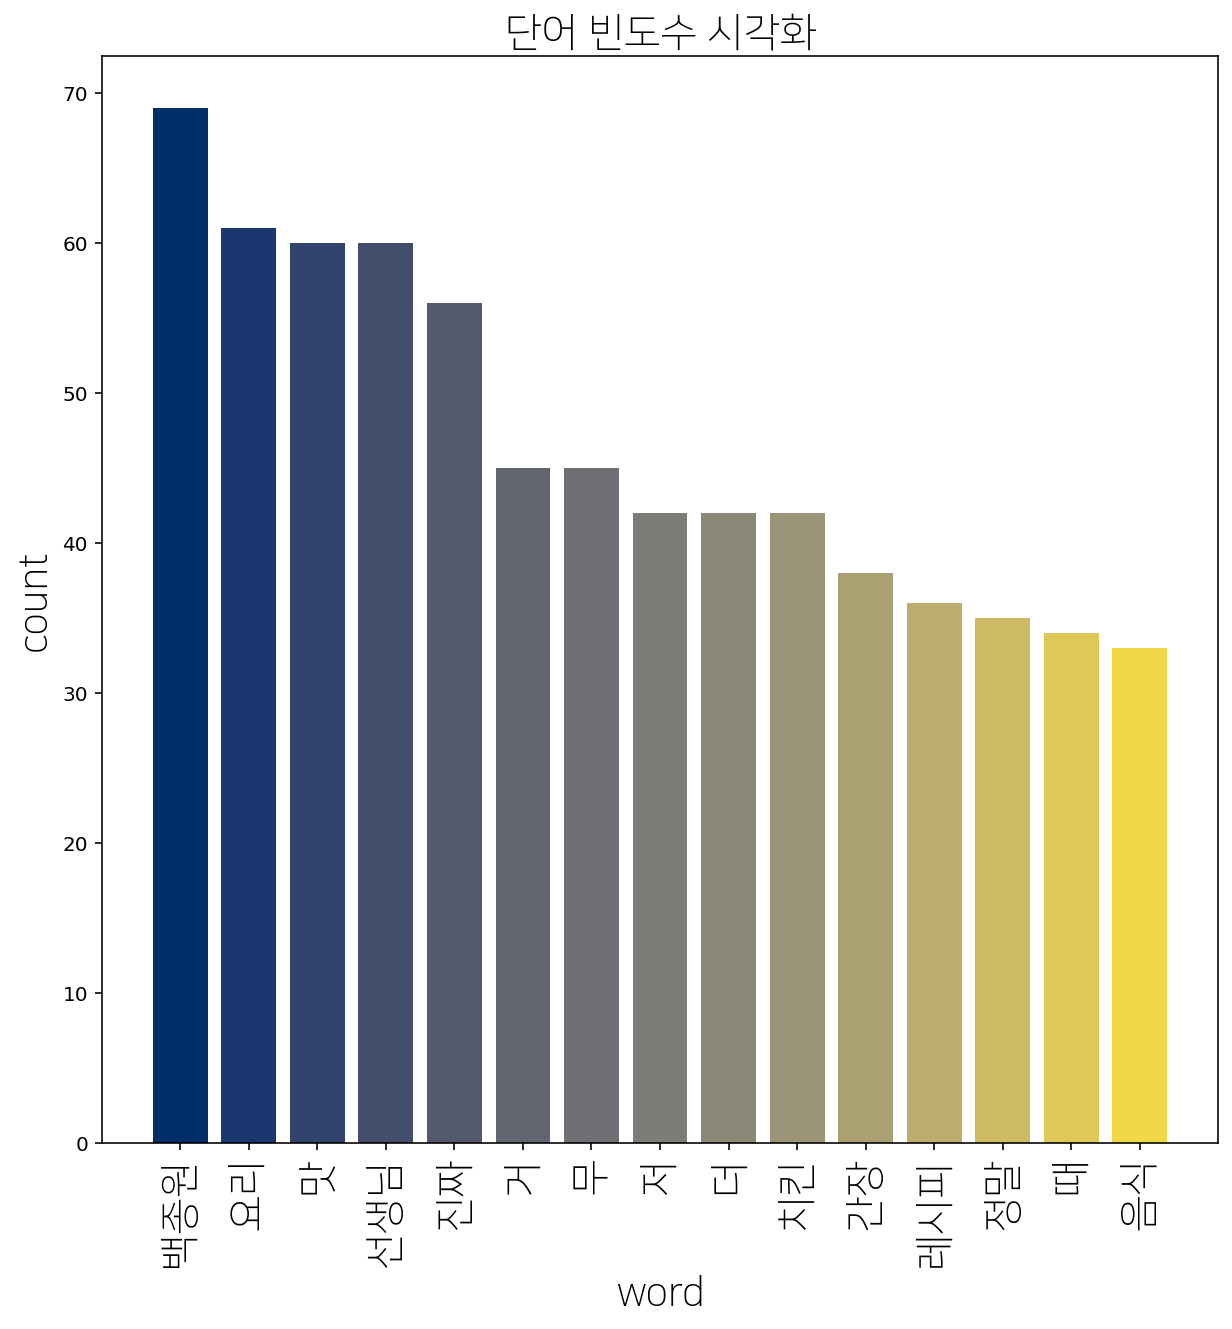

In [29]:

noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(15)

#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

#차트에 컬러넣기
import seaborn as sns
colors = sns.color_palette('cividis',len(test))
#그리고 밑에다가 plt.차트형식(괄호 안에 color=추가)



index = np.arange(len(test))
plt2.bar(index,test['count'].tolist(),color=colors)
plt2.xlabel('word', fontsize=8, fontproperties=fontprop)
plt2.ylabel('count', fontsize=8, fontproperties=fontprop)
plt2.xticks(index, test['word'].tolist(), fontsize=1, fontproperties=fontprop, rotation=90)
plt2.title('단어 빈도수 시각화',  fontsize=12, fontproperties=fontprop)
plt2.rcParams['figure.figsize'] = [10, 5]
fig2 = plt2.figure(1)
fig2.set_size_inches(10, 10) # 사이즈 조정

plt2.show()



### 긍정 부정 분석

In [103]:
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

#### 긍정어 부정어 사전

In [138]:
#-*-coding:utf-8-*-

import json

class KnuSL():

	def data_list(wordname):	
		with open('/content/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		for i in range(0, len(data)):
			if data[i]['word'] == wordname:
				result.pop()
				result.pop()
				result.append(data[i]['word_root'])
				result.append(data[i]['polarity'])	
		
		r_word = result[0]
		s_word = result[1]
							
		print('어근 : ' + r_word)
		print('극성 : ' + s_word)		
		
		
		return r_word, s_word

if __name__ == "__main__":
	
	ksl = KnuSL
	
	print("\nKNU 한국어 감성사전입니다~ :)")
	print("사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!")
	print("종료하시려면 #을 입력해주세요!!!")
	print("-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정")
	print("\n")	

	while(True):
		wordname = input("word : ")
		wordname = wordname.strip(" ")		
		if wordname != "#":
			print(ksl.data_list(wordname))
			print("\n")	
				

		elif wordname == "#":
			print("\n이용해주셔서 감사합니다~ :)")
			break



KNU 한국어 감성사전입니다~ :)
사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!
종료하시려면 #을 입력해주세요!!!
-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정


word : 쩐다
어근 : None
극성 : None
('None', 'None')


word : 좋다
어근 : 좋
극성 : 2
('좋', '2')


word : 맛ㄴ다ㅏ
어근 : None
극성 : None
('None', 'None')


word : 고소
어근 : None
극성 : None
('None', 'None')


word : quit
어근 : None
극성 : None
('None', 'None')


word : #

이용해주셔서 감사합니다~ :)


#### 정규 표현식 처리

In [34]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result



#### 불용어 사전

In [ ]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

불용어 사전에 추가하기

In [102]:
recipy_words = ['백쌤', '백종원','보다','요린이','에어프라이어','요식업','겁나','썸네일','존귀','썸넬']
for word in recipy_words:
    stopwords.append(word)

#### 명사 형태소 추출

In [139]:
# lists 에서 명사형태소 추출
okt=Okt()
corpus = "".join(lists)
nouns = okt.nouns(apply_regular_expression(corpus))

# 카운트 세기
counter = Counter(nouns)
counter.most_common(10)

# 한글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

#print(nouns)

[('시금치', 137),
 ('진짜', 54),
 ('해먹', 31),
 ('백종원', 26),
 ('선생님', 25),
 ('정말', 24),
 ('요리', 24),
 ('오늘', 20),
 ('고기', 20),
 ('마늘', 19)]

* 한글자 명사 제거
* 두 글자 키워드가 대부분 의미 있는 단어지만, ‘수’, ‘것’, '곳’과 같은 한 글자 키워드는 분석에 딱히 좋은 영향을 미치지 않은 것으로 보임.

BoW 벡터 생성

In [132]:
def text_cleaning(text):
    hangul = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

#print(nouns)

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(lists)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)


['저희', '어머니', '선생님', '오늘', '덕분', '점심', '친정', '텃밭', '온', '열무', '고', '제대로', '항상', '파이팅', '물이', '왜', '노랑', '색', '열무', '데', '꼭', '더', '고소', '단점', '국물', '읍', '뻑뻑', '역시', '백종원', '레시피', '이유', '당장', '해먹', '저', '밥그릇', '정보', '좀', '선생님', '빛', '알', '판끼', '열무', '항상', '김치', '해', '오늘', '밥', '해', '역시', '굿', '굿굿굿', '요사', '거', '더', '형님', '된장', '쥬', '된장', '어유', '됫', '기', '거', '잡솨', '형', '만능', '사라', '거', '돠', '선생님', '저', '요리', '선생님', '요리', '이해', '아주', '이제', '저', '선생님', '요리', '계속', '요리', '해', '선생님', '응원', '열무', '열무', '해먹', '김', '열무', '양념', '간장', '별미', '오늘', '열무', '대신', '가지', '존맛', '료', '준비', '도중', '식용유', '올리브유', '걱정', '된장', '고추장', '향', '올리브', '향', '하나', '다행', '고온', '엑스트라', '버진', '타', '가지', '올리브유', '궁합', '인분', '정도', '쟁', '거', '진짜', '배추', '거', '양배추', '쌈', '진짜', '존맛', '양배추', '통', '혼자', '돼지고기', '시금치', '청량고추', '밥', '해먹', '시금치', '열무', '해도', '것', '미국', '무심', '거', '생각', '더', '맛', '설', '그냥', '막', '얼', '갈이', '배추', '식감', '삭', '열무', '버전', '더', '보리밥', '맛', '청양고추', '꼭', '풋', '고추', '선생님', '오리고기', '더', '방법', '여러분', '거', '

In [143]:
sum=0;
for i in nouns:
  KnuSL.data_list(i)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : 편애
극성 : -1
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : None
극성 : None
어근 : Non

#### Ex)

In [ ]:
okt = Okt()
nouns = okt.nouns(apply_regular_expression(df2['comment'][0]))
nouns

##### 말뭉치 생성

In [ ]:
corpus = "".join(df2['comment'].tolist())
corpus


불용어구 삭제

In [ ]:
apply_regular_expression(corpus)

##### 전체 말뭉치에서 명사 형태소 추출

In [64]:
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['대부분', '레시피', '요리', '정도', '더', '이해', '병원', '남편', '간병', '콩', '요리', '집', '가면', '꼭', '해먹', '보고', '감사', '맛', '믹서기', '겄', '골목', '막걸리', '란', '콩', '전이', '캬', '뉴욕', '딸', '공유', '나중', '항상', '쌤', '멋', '유', '김치', '추가', '김치', '콩', '더', '몇', '지난', '여름', '콩국수', '콩', '갑자기', '녹두', '빈대떡', '녹두', '냉동', '보관', '콩', '믹서기', '갈고', '신', '김치', '맛', '녹두', '빈대떡', '진짜', '그때', '가루', '조금', '인지', '반죽', '약간', '거렸', '혹시', '콩전', '검색', '쌤', '최근', '레시피', '거', '진짜', '안', '콩', '쓰기', '최고', '듯', '비지', '못', '콩', '한번', '그닥', '청양고추', '맛', '콩', '시도', '전', '실패', '듯해', '반죽', '콩', '런가', '전', '실패', '거', '진짜', '임', '내', '콩', '진짜', '콩', '적도', '콩', '요리', '오늘', '콩전', '맛', '부로', '해도', '요', '저', '좀', '더', '것', '뭘', '요', '계란후라이', '용', '프라이팬', '거기', '다가', '모양', '콩전', '조치', '캬', '막걸리', '한잔', '갑', '당음', '맛', '어유', '유', '대표', '콩전', '보통', '왜', '콩', '곡물', '어차피', '때', '수분', '보기', '콩', '알', '밥알', '갠', '기분', '부부', '식', '우렁각시', '티브', '백종원', '좀', '늘', '처치', '곤란', '병아리', '콩', '광장시장', '빈대떡', '맛', '이나', '쌤', '장아찌', '간장', '파랑', '최고', '우리', '집', '콩', '고민',

##### 빈도수 세기

In [65]:
counter = Counter(nouns)

In [66]:
counter.most_common(10)

[('맛', 948),
 ('요리', 864),
 ('선생님', 770),
 ('진짜', 724),
 ('백종원', 635),
 ('거', 587),
 ('레시피', 458),
 ('저', 455),
 ('정말', 446),
 ('때', 444)]

* 한글자 명사 제거
* 위 결과에서 보이듯이, 두 글자 키워드가 대부분 의미 있는 단어지만, ‘수’, ‘것’, '곳’과 같은 한 글자 키워드는 분석에 딱히 좋은 영향을 미치지 않은 것으로 보임.



In [67]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('요리', 864),
 ('선생님', 770),
 ('진짜', 724),
 ('백종원', 635),
 ('레시피', 458),
 ('정말', 446),
 ('설탕', 402),
 ('음식', 365),
 ('오늘', 343),
 ('버터', 342)]

#### 단어 리스트

In [135]:
print(word_list)

['가게', '가끔', '가늠', '가라오케', '가루', '가요', '가장', '가족', '가지', '간고', '간다', '간도', '간이', '간장', '갈이', '감사', '감칠맛', '감탄', '강추', '개맛', '개인', '개존맛', '거기', '거만', '거의', '걱정', '건너', '걸루', '검사', '검색', '게시', '계량', '계속', '고기', '고소', '고온', '고추', '고추장', '고춧가루', '고해', '골목', '곱하기', '공중파', '과일', '구독', '국물', '국수', '굿굿굿', '궁금', '궁합', '그것', '그냥', '그람', '그릇', '글자', '금방', '기대', '기도', '기름', '기억', '김밥', '김치', '꾸벅', '끼니', '나물', '나중', '내일', '냄새', '냉면', '냉장', '냉장고', '년차', '노란색', '노랑', '농가', '님들', '다다', '다라', '다른', '다시', '다음', '다행', '단도', '단점', '달걀후라이', '달라', '달팽이', '달후', '당장', '대박', '대신', '대충', '대통령', '대표', '대한민국', '댓글', '더더', '더위', '덕분', '덕이', '도전', '도중', '독자', '동치미', '돼지고기', '된장', '듯이', '라나', '라면', '란점', '레시피', '로만', '로움', '마늘', '마리나', '마리텔', '마음', '마이크', '마트', '만년', '만능', '먹기', '먹었쥬', '메뉴', '명중', '모두', '무도', '무무', '무슨', '무심', '물김치', '물이', '뭔가', '미국', '미림', '미소', '바로', '바스', '박해', '밥그릇', '밥때', '방법', '방송', '배즙', '배추', '백선생', '백종원', '버전', '버진', '번지', '별로', '별미', '보겸', '보고', '보관', '보리밥', '보신', '보약', '보이지', '볶음', '분명', 

In [106]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 1,  3, 40, ...,  2,  4,  5])

👻👻👻👻👻👻👻👻👻👻👻👻👻👻👻👻

In [107]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [108]:
bow_vect.shape

(9179, 5303)

##### "단어" - "총 등장 횟수" Matching


In [75]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 1,
 '가감': 3,
 '가게': 40,
 '가격': 39,
 '가공': 8,
 '가구라': 1,
 '가기': 3,
 '가까이': 3,
 '가끔': 13,
 '가나': 4,
 '가네욬': 1,
 '가늠': 1,
 '가능': 12,
 '가다가': 2,
 '가다랑어': 4,
 '가다랑어포': 8,
 '가당': 1,
 '가도': 3,
 '가득': 6,
 '가라오케': 2,
 '가락동': 2,
 '가루': 171,
 '가르침': 2,
 '가마솥': 2,
 '가맹': 6,
 '가면': 24,
 '가미': 1,
 '가발': 4,
 '가병': 1,
 '가사': 2,
 '가사도': 1,
 '가성': 13,
 '가세': 2,
 '가수': 9,
 '가쉽': 1,
 '가스': 13,
 '가스나': 1,
 '가스레인지': 4,
 '가스렌지': 4,
 '가슴': 16,
 '가시': 10,
 '가시박': 4,
 '가식': 2,
 '가신': 1,
 '가쓰오부시': 4,
 '가열': 1,
 '가염': 4,
 '가오': 8,
 '가왜': 3,
 '가요': 63,
 '가용': 4,
 '가운데': 4,
 '가위': 2,
 '가유': 4,
 '가을': 1,
 '가장': 30,
 '가장자리': 2,
 '가정': 31,
 '가제': 2,
 '가젤': 1,
 '가족': 56,
 '가즈': 1,
 '가지': 88,
 '가지가지': 1,
 '가짜': 4,
 '가쯔오부시': 4,
 '가해': 2,
 '각시': 3,
 '각인': 2,
 '각자': 2,
 '간걸': 1,
 '간고': 1,
 '간다': 11,
 '간단': 23,
 '간도': 4,
 '간만': 2,
 '간병': 4,
 '간볼때': 2,
 '간부': 5,
 '간소': 2,
 '간수': 1,
 '간식': 19,
 '간이': 14,
 '간장': 155,
 '간장게장': 1,
 '간접': 2,
 '간짜장': 2,
 '간첩': 2,
 '간청': 1,
 '간판': 2,
 '간편': 4,
 '간편식': 2,
 '간함': 1,
 '갈고': 16,

#### TF-IDF 변환

* Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [77]:
print(tf_idf_vect.shape)

(9179, 5303)


* 한 행(row)은 한 리뷰를 의미
* 한 열(column)은 한 단어를 의미

In [78]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 5088)	0.19461725811655148
  (0, 3970)	0.23990822257038452
  (0, 3646)	0.32620456557592226
  (0, 3344)	0.3176080460170433
  (0, 1948)	0.208898741540019
  (0, 1944)	0.3546569378140918
  (0, 1278)	0.18326621748753155
  (0, 972)	0.34178684035331414
  (0, 724)	0.28905708717033785
  (0, 105)	0.23093077261631131
  (0, 76)	0.3809528818017161
  (0, 25)	0.30895109658943376


In [79]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())


(1, 5303)
[[0. 0. 0. ... 0. 0. 0.]]


##### “벡터” - “단어” mapping

In [80]:
vect.vocabulary_

{'대부분': 972,
 '레시피': 1278,
 '요리': 3344,
 '정도': 3970,
 '이해': 3646,
 '병원': 1944,
 '남편': 724,
 '간병': 76,
 '가면': 25,
 '해먹': 5088,
 '보고': 1948,
 '감사': 105,
 '믹서기': 1722,
 '사야겄': 2240,
 '골목': 347,
 '막걸리': 1404,
 '전이': 3932,
 '뉴욕': 831,
 '공유': 372,
 '나중': 694,
 '항상': 5076,
 '김치': 596,
 '추가': 4473,
 '지난': 4216,
 '여름': 3129,
 '콩국수': 4625,
 '갑자기': 120,
 '녹두': 791,
 '빈대떡': 2155,
 '냉동': 747,
 '보관': 1950,
 '갈고': 93,
 '진짜': 4266,
 '그때': 501,
 '가루': 21,
 '조금': 4043,
 '인지': 3681,
 '반죽': 1790,
 '약간': 2977,
 '거렸': 172,
 '혹시': 5180,
 '콩전': 4634,
 '검색': 209,
 '최근': 4459,
 '쓰기': 2830,
 '최고': 4454,
 '비지': 2145,
 '한번': 5033,
 '그닥': 496,
 '청양고추': 4413,
 '시도': 2686,
 '실패': 2793,
 '듯해': 1171,
 '런가': 1266,
 '적도': 3903,
 '오늘': 3232,
 '부로': 2035,
 '해도': 5084,
 '계란후라이': 269,
 '프라이팬': 4934,
 '거기': 163,
 '다가': 859,
 '모양': 1580,
 '조치': 4067,
 '한잔': 5049,
 '어유': 3039,
 '대표': 998,
 '보통': 1984,
 '곡물': 342,
 '어차피': 3056,
 '수분': 2549,
 '보기': 1952,
 '밥알': 1817,
 '기분': 559,
 '부부': 2039,
 '우렁각시': 3376,
 '티브': 4802,
 '처치': 438

In [81]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


{972: '대부분', 1278: '레시피', 3344: '요리', 3970: '정도', 3646: '이해', 1944: '병원', 724: '남편', 76: '간병', 25: '...


### 감성 분류 - Logistic Regression

#### Label